In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'F:\Summer 2022\CSE 422\New folder\archive\Fake.csv')
df1 = pd.read_csv(r'F:\Summer 2022\CSE 422\New folder\archive\True.csv')

In [3]:
df.shape #

(23481, 4)

In [4]:
df1.shape

(21417, 4)

#### df = fake news dataframe, df1 = true news dataframe
#### label  0 = false , 1 = true
#### labeled the fake news data as 0 and 1

In [5]:
df['Label'] = 0

In [6]:
df.head(2) 

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0


In [7]:
df1['Label'] = 1 

In [8]:
df1.head(2) 

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1


In [9]:
frames = [df, df1] 

In [10]:
c_df = pd.concat(frames)   

#### we cant feed the model same data , like only the fake news, we have to balance out the fake news and true news, that is why we combined the dataset.

In [11]:
c_df.shape

(44898, 5)

In [12]:
c_df.sample(5) 

,title,text,subject,date,Label
19629,SORRY LIBERALS…You Can Stop With The Petitions...,"Okay, let s address this Hillary might win th...",left-news,"Nov 12, 2016",0
16163,BONKERS BERNIE SANDERS: Prioritizing Jobs Over...,https://www.youtube.com/watch?v=GPqQIlWksbgVer...,Government News,"Apr 1, 2017",0
20263,More arrests in apparent Saudi campaign agains...,(Reuters) - Saudi Arabia has detained more cle...,worldnews,"September 12, 2017",1
6007,WATCH: Dixie Chicks Kick Off First Tour In A ...,They haven t toured in ten years but the Dixie...,News,"June 5, 2016",0
13727,WATCH CROOKED HILLARY Make Claim No Lives Lost...,"What about Chris Stevens, Sean Smith, Glen Doh...",politics,"Jun 9, 2016",0


# Preprocessing 

In [13]:
c_df.isnull().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

In [14]:
# dropping unncessary columns
u_df = c_df.drop(['subject','date'], axis=1) 

In [15]:
u_df.head(2)

,title,text,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0


In [16]:
u_df['content'] = u_df['title']+' '+u_df['text'] # adding the title and the text columns data, 
# because oour model will learn from the 
# headlines as well as text, and based on that it will give out result.

In [17]:
u_df.head(3)

,title,text,Label,content
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,Sheriff David Clarke Becomes An Internet Joke...


In [18]:
u_df.shape # we have around 44k data 

(44898, 4)

In [19]:
sameple_df = u_df.sample(30000) 
# we cant take all this data, becasue it will take a lot of time to train, that is why we took 5000 data for traing,
# we took sample data because we want randomness, we cant take only the 1st 5000 data, .sample(5000), will provide
# diffrerent true and false news data of 5000

In [20]:
sameple_df['Label'].value_counts()
# 0 = false = 2606 and 1 = true = 2394

0    15705
1    14295
Name: Label, dtype: int64

## Visualizing data

In [21]:
import matplotlib.pyplot as plot

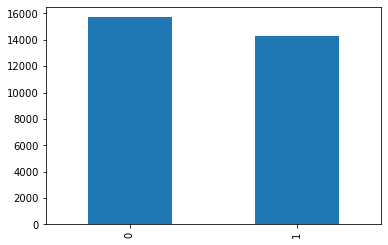

In [22]:
sameple_df["Label"].value_counts().plot.bar()
plot.show()

#### as you can see, we have almost similar amount of data( true and false ) for training.

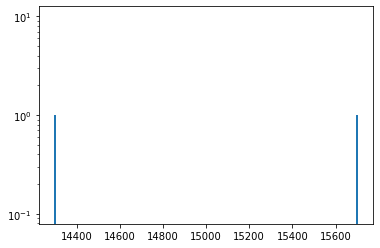

In [96]:
plot.hist(sameple_df["Label"].value_counts().values, bins = 160)
plot.yscale('log')
plot.show()

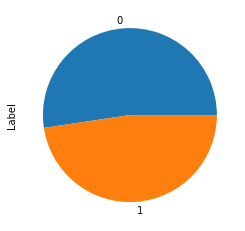

In [103]:
sameple_df["Label"].value_counts().plot.pie()
plot.show()

In [24]:
X = sameple_df.drop(columns='Label', axis=1)
Y = sameple_df['Label'] 

In [25]:
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [26]:
port_stem = PorterStemmer()

In [27]:
# explaind all the steps below
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower() 
    stemmed_content = stemmed_content.split() 
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [28]:
sameple_df['content'] =sameple_df['content'].apply(stemming) 

In [29]:
#separating the data and label
X = sameple_df['content'].values
Y = sameple_df['Label'].values

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

# Spliting data

In [32]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [115]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
## 21K for training, 9k for testing

(21000, 75460)
(9000, 75460)
(21000,)
(9000,)


# Training our model

## Logisitic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model = LogisticRegression()

In [68]:
model.fit(X_train,Y_train)

LogisticRegression()

### Accuracy

In [69]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [70]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [71]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9900952380952381


In [72]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9836666666666667


### f1-score

In [73]:
y_pred = model.predict(X_test)
print(f1_score(Y_test, y_pred))

0.9829129373474369


### Precision

In [74]:
print(precision_score(Y_test, y_pred))

0.9812021350661406


### Recall

In [75]:
print(recall_score(Y_test, y_pred))   

0.9846297158826269


# SVM

In [76]:
from sklearn import svm

In [77]:
model_3 = svm.SVC(kernel='linear') # Linear Kernel

In [78]:
model_3.fit(X_train, Y_train)

SVC(kernel='linear')

### Accuracy

In [79]:
# accuracy score on the training data
X_train_prediction = model_3.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9977142857142857


In [80]:
# accuracy score on the test data
X_test_prediction = model_3.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9926666666666667


### f1-score

In [81]:
y_pred = model_3.predict(X_test)
print(f1_score(Y_test, y_pred))

0.9923166472642606


### Precision

In [82]:
print(precision_score(Y_test, y_pred))

0.9920856610800745


### Recall

In [83]:
print(recall_score(Y_test, y_pred))  

0.9925477410340009


# Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
model_4 =  DecisionTreeClassifier()

In [86]:
model_4.fit(X_train, Y_train)

DecisionTreeClassifier()

### Accuracy

In [87]:
# accuracy score on the training data
X_train_prediction = model_4.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [88]:
# accuracy score on the test data
X_test_prediction = model_3.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9926666666666667


### f1- score

In [89]:
y_pred = model_4.predict(X_test)
print(f1_score(Y_test, y_pred))

0.9962782042335426


### Percision

In [90]:
print(precision_score(Y_test, y_pred))

0.9951208178438662


### Recall

In [91]:
print(recall_score(Y_test, y_pred))  

0.9974382859804378


# Testing 

## Label  0 = Fake , 1 = True

# With Decision Tree

In [92]:
X_new = X_test[83] # change the value in here. 

prediction = model_4.predict(X_new)
print('label : ',prediction)

if (prediction[0]==0):
  print('The news is Fake')
else:
  print('The news is True')

label :  [1]
The news is True


In [93]:
X_new = X_test[82] # change the value in here. 

prediction = model_4.predict(X_new)
print('label : ',prediction)

if (prediction[0]==0):
  print('The news is Fake')
else:
  print('The news is True')

label :  [0]
The news is Fake


# With Support Vector Machiene

In [94]:
X_new = X_test[83] # change the value in here. 

prediction = model_3.predict(X_new)
print('label : ',prediction)

if (prediction[0]==0):
  print('The news is Fake')
else:
  print('The news is True')

label :  [1]
The news is True


In [95]:
X_new = X_test[82] # change the value in here. 

prediction = model_3.predict(X_new)
print('label : ',prediction)

if (prediction[0]==0):
  print('The news is Fake')
else:
  print('The news is True')

label :  [0]
The news is Fake
